# Analýza dát

V provom kroku si najprv zanalyzujeme náš dataset pomocou knižnice **pandas**. Ako tému sme si vybrali `predpoved nákladov na zdravotnú starostlivost`. Dataset môžeme nájsť na [tejto adrese](https://www.kaggle.com/mirichoi0218/insurance) alebo na [gite](https://github.com/matebence/Mate_NS2020/blob/master/dataset.csv).  Už samotný názov témy naznačuje že ako dáta bude musieť analyzovať zdravotný stav ľudi ako mužov aj ženy v roznom veku a to v rozných regiónoch daného štátu

## Importovanie knižníc

In [19]:
#knižnice pre analýzu dát
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#knižnice pre získanie datasetu
import requests
import io

In [20]:
#Kedže náš dataset sa už nachádza v našom git repozirátri, tak to využijeme a pomocou knižnice requests urobíme GET požiadavku na získanie datasetu
url = "https://raw.githubusercontent.com/matebence/Mate_NS2020/master/dataset.csv"
response = requests.get(url).content
data_frame = pd.read_csv(io.StringIO(response.decode('utf-8')))

## Získanie informácií z metadát tabuľky

In [21]:
#Náš dataset pozostáva z 1338 riadkov a 7 stľpcov, kde shape[0] predstavuje riadky a shape[1] stľpce
data_frame.shape

(1338, 7)

In [22]:
# názvy stľpcov ktorými budeme pracovať
data_frame.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Vysvetlenie význam stľpcov

- `age (vek)`         - vek danej osoby
- `sex (pohlavie)`    - pohlavie danej osoby
- `bmi (bmi)`         - Index telesnej hmotnosti
- `children (deti)`   -  Počet detí, na ktoré sa vzťahuje zdravotné poistenie
- `smoker (fajčiar)`  - Či daná osoba fajčí
- `region (región)`   - Oblasť kde daná osoba žije (USA)
- `charges (výdavky)` - Jednotlivé náklady na zdravotnú starostlivosť hradené zdravotným poistením

In [23]:
# dátové typy stľpcov
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [24]:
# Ukážka dát
data_frame.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
# Počet, priemer, max, min jednotlivých stľpcov
data_frame.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Teraz zistíme kľúčové informácie o dátach ako
- počet mužov a žien
- počet fajčiarov
- počet detí
- počet obyvatelov v jednotlivých regiónov
- výdavky na zdravotnú starostlivosť závislosti od veku
- hodnota bmi závislosti od veku

## Počet mužov a žien

In [26]:
data_frame.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

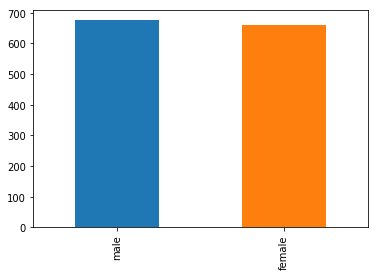

In [27]:
data_frame.sex.value_counts().plot.bar()

## Počet fajčiarov

In [28]:
data_frame.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

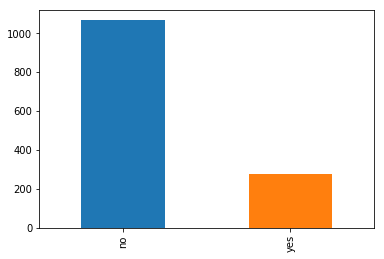

In [29]:
data_frame.smoker.value_counts().plot.bar()

## Počet obyvatelov v jednotlivých regiónov

In [30]:
data_frame.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

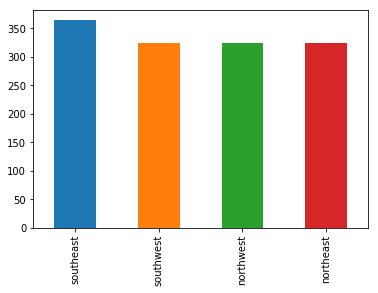

In [31]:
data_frame.region.value_counts().plot.bar()

## Výdavky na zdravotnú starostlivosť závislosti od veku

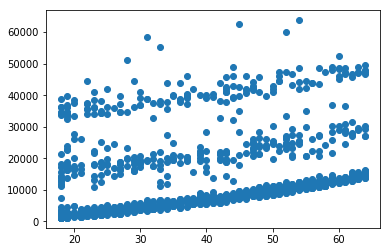

In [32]:
plt.scatter("age","charges",data=data_frame)

## Hodnota bmi závislosti od veku

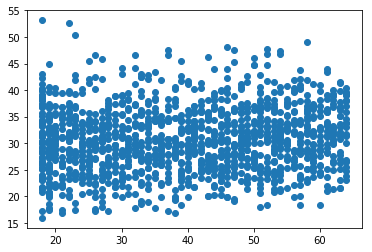

In [33]:
plt.scatter("age","bmi",data=data_frame)

## A nakoniec použijeme knižnicu seaborn pre znázornenie dát ako celok

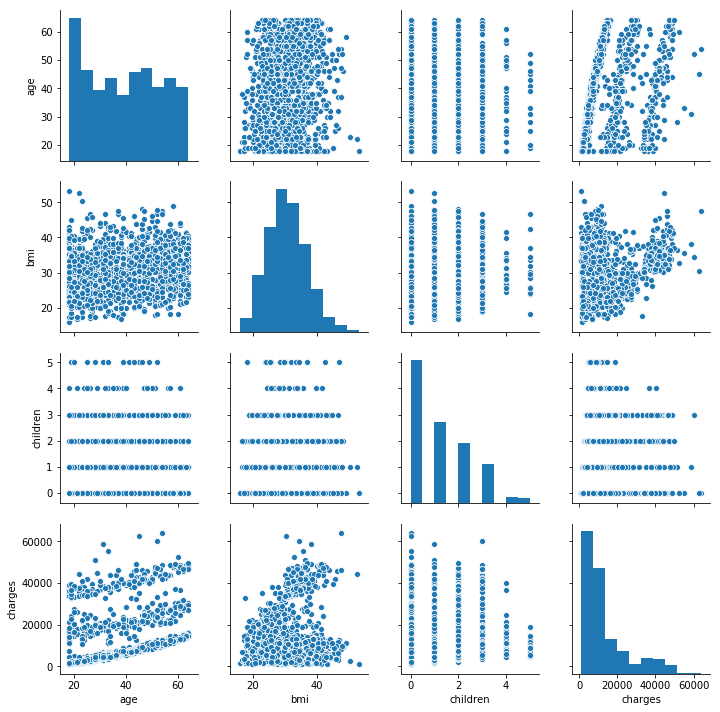

In [34]:
sns.pairplot(data_frame)